In [6]:
import yfinance as yf

In [7]:
# Extracting Tesla stock data
tesla_data = yf.download("TSLA", start="2020-01-01", end="2023-12-31")

# Resetting the index
tesla_data.reset_index(inplace=True)

# Displaying the first five rows of the data
print(tesla_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date      Close       High        Low       Open     Volume
Ticker                  TSLA       TSLA       TSLA       TSLA       TSLA
0      2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
1      2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2      2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
3      2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
4      2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500


In [2]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import pandas as pd

# Download Tesla financial data
tesla = yf.Ticker("TSLA")

# Get quarterly financials
tesla_financials = tesla.financials

# Display quarterly revenue
revenue_data = tesla_financials.loc['Total Revenue']
revenue_df = pd.DataFrame(revenue_data)
revenue_df.reset_index(inplace=True)
revenue_df.columns = ['Date', 'Revenue']

# Display the last 5 rows
print(revenue_df.tail())


        Date        Revenue
0 2023-12-31  96773000000.0
1 2022-12-31  81462000000.0
2 2021-12-31  53823000000.0
3 2020-12-31  31536000000.0
4 2019-12-31            NaN


In [2]:
import yfinance as yf

In [3]:
# Define the stock ticker symbol
ticker = "GME"

# Define the time period for historical data
start_date = "2020-01-01"
end_date = "2023-12-31"

# Download historical stock data for GME
gme_data = yf.download(ticker, start=start_date, end=end_date)

# Reset the index
gme_data.reset_index(inplace=True)

# Save to a CSV file (optional)
gme_data.to_csv("gme_data.csv", index=False)

# Display the first five rows
print(gme_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date   Close    High     Low    Open    Volume
Ticker                GME     GME     GME     GME       GME
0      2020-01-02  1.5775  1.6175  1.5175  1.5350  17814400
1      2020-01-03  1.4700  1.5625  1.4600  1.5525  14175600
2      2020-01-06  1.4625  1.4775  1.4000  1.4500  13579200
3      2020-01-07  1.3800  1.4575  1.3600  1.4425  20912000
4      2020-01-08  1.4300  1.4625  1.3525  1.3725  22517600


In [8]:
import yfinance as yf
import pandas as pd

# Download GME stock financial data using yfinance
ticker = "GME"
gme = yf.Ticker(ticker)

# Extract financial data (quarterly revenue)
income_statement = gme.financials.T  # Transpose for better readability
revenue = income_statement["Total Revenue"]

# Format the DataFrame
gme_revenue = pd.DataFrame({
    "Date": revenue.index,
    "Revenue (USD)": revenue.values
})

# Display the last 5 rows
print(gme_revenue.tail())

# Save the results to a CSV file
gme_revenue.to_csv("gme_revenue.csv", index=False)


        Date Revenue (USD)
0 2024-01-31  5272800000.0
1 2023-01-31  5927200000.0
2 2022-01-31  6010700000.0
3 2021-01-31  5089800000.0
4 2020-01-31           NaN


In [9]:
pip install --upgrade requests beautifulsoup4 pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
Note: you may need to restart the kernel to use updated packages.


In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the MacroTrends GME revenue page
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

try:
    # Send a GET request to the website
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Raise an exception for HTTP errors

    # Parse the page content
    soup = BeautifulSoup(response.content, "html.parser")

    # Locate the revenue table
    table = soup.find("table", {"class": "historical_data_table table"})

    # Extract rows of data
    rows = table.find_all("tr")
    data = []

    for row in rows[1:]:  # Skip header row
        cols = row.find_all("td")
        if len(cols) >= 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            data.append({"Date": date, "Revenue (USD)": revenue})

    # Convert to DataFrame
    gme_revenue = pd.DataFrame(data)
    gme_revenue["Revenue (USD)"] = pd.to_numeric(gme_revenue["Revenue (USD)"], errors="coerce")
    gme_revenue.dropna(inplace=True)

    # Display the last 5 rows
    print(gme_revenue.tail())

except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")


    Date  Revenue (USD)
11  2013           8887
12  2012           9551
13  2011           9474
14  2010           9078
15  2009           8806


In [14]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 119.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 123.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 103.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 13.9 MB/s eta 0:00:00


In [15]:
import yfinance as yf
import matplotlib.pyplot as plt

In [16]:
# Download GME stock data
gme_data = yf.download('GME', start='2020-01-01', end='2024-12-31')

[*********************100%***********************]  1 of 1 completed


In [17]:
def make_graph(data, title="GameStop Stock Price"):
    # Plot the stock data (using 'Close' price)
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='GME Close Price', color='blue')
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    
    # Display the graph
    plt.legend()
    plt.grid(True)
    plt.show()

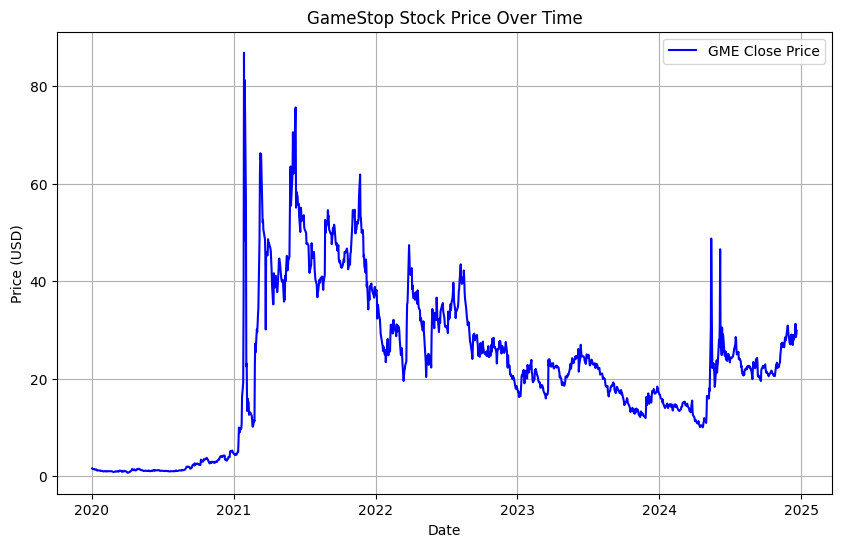

In [18]:
make_graph(gme_data, title="GameStop Stock Price Over Time")

In [19]:
!pip install matplotlib

In [20]:
import yfinance as yf
import matplotlib.pyplot as plt

In [21]:
# Download TSLA stock data
tsla_data = yf.download('TSLA', start='2020-01-01', end='2024-12-31')

[*********************100%***********************]  1 of 1 completed


In [22]:
def make_graph(data, title="Tesla Stock Price"):
    # Plot the stock data (using 'Close' price)
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='TSLA Close Price', color='green')
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    
    # Display the graph
    plt.legend()
    plt.grid(True)
    plt.show()

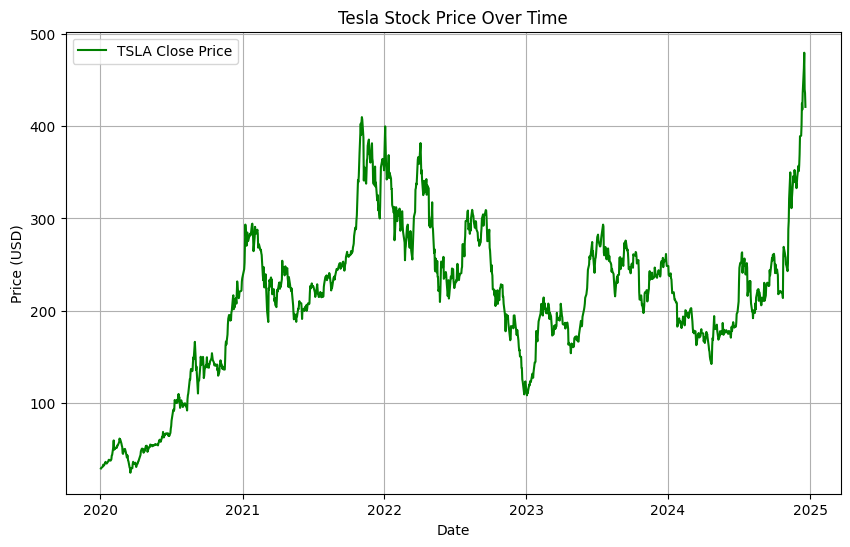

In [23]:
make_graph(tsla_data, title="Tesla Stock Price Over Time")